## 실습

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data2 = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data2.sample(10)

,headlines,text
64417,Insurer offers Apple Watch 3 for $25 if fitnes...,Life insurance provider John Hancock will offe...
68780,Karni Sena members burn Padmavati posters in J...,"According to reports, the members of Rajput or..."
77835,Snapdeal to lay off 80% of its workforce: Report,E-commerce major Snapdeal will reportedly lay ...
71315,Cosmonaut snaps Atlantic's most powerful hurri...,Russian cosmonaut Sergey Ryazanskiy aboard the...
7079,We'd be worst blokes if we celebrate like Kohl...,Australia head coach Justin Langer has said if...
97729,Venezuelan bakers held for making brownies ami...,Four bakers have been arrested in Venezuela fo...
48091,"RBI uncovers Ã¢ÂÂ¹23,000 crore bad loans in S...",The Reserve Bank of India has unearthed hidden...
41220,"Punjab Class 12, 10 CBSE Boards postponed over...",Class 12 and 10 CBSE Board examinations in Pun...
40415,Real Madrid boss quits 5 days after record 3rd...,Zinedine Zidane has stepped down as Real Madri...
16793,Tiger Global leads $300 mn funding in US deliv...,American hedge fund Tiger Global Management ha...


In [4]:
data2 = pd.read_csv(os.getenv("HOME")+"/aiffel/E08/news_summary_more.csv", nrows=100000)
print('전체 샘플수 :', (len(data2)))

전체 샘플수 : 98401


In [5]:
data2.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [6]:
data2 = data2[['text','headlines']]
data2.head()

#랜덤한 15개 샘플 출력
data2.sample(15)

,text,headlines
30865,US-based cereal maker Kellogg on Tuesday said ...,Kellogg shuts down Venezuela operations over e...
65494,The Tamil Nadu government will soon set up coa...,Tamil Nadu govt to set up IAS academies in all...
59958,Amid growing death threats against actress Dee...,Deepika to skip global summit in Hyd amid deat...
59314,Indian shuttler PV Sindhu reached the Hong Kon...,Sindhu reaches Hong Kong Open final for second...
76353,"A low-level, horizontal, tube-shaped cloud was...",Video: Rolling fog cloud passes over Californi...
4355,BJP MPs Om Prakash Yadav and Harish Dwivedi on...,"How do you plan to tackle Selfitis, BJP MPs as..."
35113,"Engineer Darshan Puttannaiah, who founded a US...",Techie leaves firm he founded in US to fight K...
95349,Homegrown ride-hailing startup Ola is reported...,Ola may raise â¹650 cr from Tata's RNT Capita...
61967,"Filmmaker Imtiaz Ali, while speaking about Ran...","Ranbir is a bada janwar, he's meant for big th..."
61678,"The Union Cabinet has approved â¹25,703 crore...","Cabinet approves â¹25,700 cr for convention c..."


In [7]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data2['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data2['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [8]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data2.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data2)))

전체 샘플수 : 98360


In [9]:
print(data2.isnull().sum())

text         0
headlines    0
dtype: int64


In [10]:
data2.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data2)))

전체 샘플수 : 98360


In [11]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [12]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [13]:
# 데이터 전처리 함수
def preprocess_sentence_stpwdin(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [14]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence_stpwdin(temp_text))
print("summary:", preprocess_sentence_stpwdin(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [15]:
clean_text2 = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data2['text']:
    clean_text2.append(preprocess_sentence_stpwdin(s))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text2[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [16]:
clean_headlines = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data2['headlines']:
    clean_headlines.append(preprocess_sentence_stpwdin(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 66
텍스트의 평균 길이 : 58.23730174867833
요약의 최소 길이 : 1
요약의 최대 길이 : 18
요약의 평균 길이 : 9.553629524196827


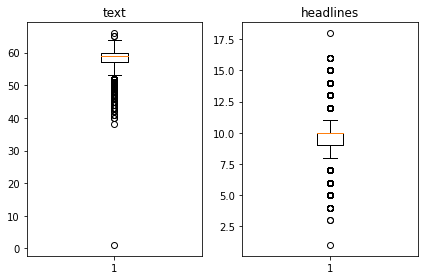

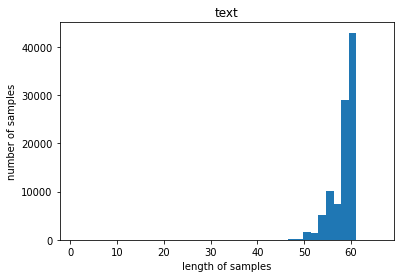

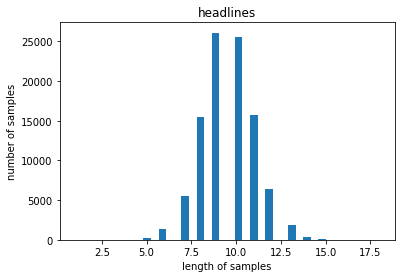

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text2_len = [len(s.split()) for s in data2['text']]
headlines_len = [len(s.split()) for s in data2['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text2_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text2_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text2_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text2_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text2_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
text2_max_len = 60
headlines_max_len = 12
print('=3')

=3


In [19]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [20]:
below_threshold_len(text2_max_len, data2['text'])
below_threshold_len(headlines_max_len,  data2['headlines'])

전체 샘플 중 길이가 60 이하인 샘플의 비율: 0.9976311508743392
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9768198454656364


In [21]:
data2 = data2[data2['text'].apply(lambda x: len(x.split()) <= text2_max_len)]
data2 = data2[data2['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data2)))

전체 샘플수 : 95855


In [22]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data2['decoder_input'] = data2['headlines'].apply(lambda x : 'sostoken '+ x)
data2['decoder_target'] = data2['headlines'].apply(lambda x : x + ' eostoken')
data2.head()

,text,headlines,decoder_input,decoder_target
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,sostoken Delhi techie wins free food from Swig...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,sostoken New Zealand end Rohit Sharma-led Indi...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,sostoken Aegon life iTerm insurance plan helps...,Aegon life iTerm insurance plan helps customer...
5,Pakistani singer Rahat Fateh Ali Khan has deni...,Rahat Fateh Ali Khan denies getting notice for...,sostoken Rahat Fateh Ali Khan denies getting n...,Rahat Fateh Ali Khan denies getting notice for...
7,Weeks after ex-CBI Director Alok Verma told th...,Govt directs Alok Verma to join work 1 day bef...,sostoken Govt directs Alok Verma to join work ...,Govt directs Alok Verma to join work 1 day bef...


In [23]:
encoder_input2 = np.array(data2['text']) # 인코더의 입력
decoder_input2 = np.array(data2['decoder_input']) # 디코더의 입력
decoder_target2 = np.array(data2['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [24]:
indices2 = np.arange(encoder_input2.shape[0])
np.random.shuffle(indices2)
print(indices2)

[ 7043 28020 95718 ... 32777 38386 30042]


In [25]:
encoder_input2 = encoder_input2[indices2]
decoder_input2 = decoder_input2[indices2]
decoder_target2 = decoder_target2[indices2]
print('=3')

=3


In [26]:
n_of_val2 = int(len(encoder_input2)*0.2)
print('테스트 데이터의 수 :', n_of_val2)

테스트 데이터의 수 : 19171


In [27]:
encoder_input2_train = encoder_input2[:-n_of_val2]
decoder_input2_train = decoder_input2[:-n_of_val2]
decoder_target2_train = decoder_target2[:-n_of_val2]

encoder_input2_test = encoder_input2[-n_of_val2:]
decoder_input2_test = decoder_input2[-n_of_val2:]
decoder_target2_test = decoder_target2[-n_of_val2:]

print('훈련 데이터의 개수 :', len(encoder_input2_train))
print('훈련 레이블의 개수 :', len(decoder_input2_train))
print('테스트 데이터의 개수 :', len(encoder_input2_test))
print('테스트 레이블의 개수 :', len(decoder_input2_test))

훈련 데이터의 개수 : 76684
훈련 레이블의 개수 : 76684
테스트 데이터의 개수 : 19171
테스트 레이블의 개수 : 19171


In [28]:
src_tokenizer2 = Tokenizer() # 토크나이저 정의
src_tokenizer2.fit_on_texts(encoder_input2_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [29]:
threshold = 7
total_cnt = len(src_tokenizer2.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer2.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90338
등장 빈도가 6번 이하인 희귀 단어의 수: 65831
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 24507
단어 집합에서 희귀 단어의 비율: 72.87188115743099
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.769915423716606


In [30]:
src_vocab = 8000
src_tokenizer2 = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer2.fit_on_texts(encoder_input2_train) # 단어 집합 재생성
print('=3')

=3


In [31]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input2_train = src_tokenizer2.texts_to_sequences(encoder_input2_train) 
encoder_input2_test = src_tokenizer2.texts_to_sequences(encoder_input2_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input2_train[:3])

[[76, 39, 180, 1425, 3534, 8, 181, 11, 2393, 214, 7400, 13, 3059, 614, 18, 163, 3947, 2, 395, 9, 167, 147, 3787, 3534, 2945, 1, 3330, 5, 740, 28, 2557, 1818, 3, 727, 65, 2, 1, 39, 1573, 660, 17, 4, 1216, 193, 14, 32, 11, 53, 193, 16, 220, 6, 2866], [755, 6955, 8, 99, 331, 170, 3187, 1407, 5, 1681, 18, 424, 5, 17, 1254, 4, 35, 2351, 130, 2221, 80, 295, 271, 1508, 32, 70, 14, 6597, 331, 21, 10, 1, 130, 12, 111, 9, 2351, 333, 6, 773, 101, 1336, 331, 10, 1, 1093, 28, 115, 1, 130, 8, 29, 7901, 5, 35, 4016, 7106, 1099], [581, 8, 10, 11, 42, 6858, 1, 7107, 880, 4, 2222, 423, 209, 1, 3924, 31, 55, 581, 32, 11, 13, 624, 50, 630, 585, 2, 5946, 2, 2222, 6, 71, 2222, 43, 521, 74, 5, 7028, 3567, 63, 875, 11, 1353, 7029, 162, 1864, 1, 848, 1330, 6, 1029, 137, 4350, 2222]]


In [32]:
tar_tokenizer2 = Tokenizer()
tar_tokenizer2.fit_on_texts(decoder_input2_train)
print('=3')

=3


In [33]:
threshold = 6
total_cnt = len(tar_tokenizer2.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer2.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40457
등장 빈도가 5번 이하인 희귀 단어의 수: 29287
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11170
단어 집합에서 희귀 단어의 비율: 72.39043923177695
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.306143248112008


In [34]:
tar_vocab = 2000
tar_tokenizer2 = Tokenizer(num_words=tar_vocab) 
tar_tokenizer2.fit_on_texts(decoder_input2_train)
tar_tokenizer2.fit_on_texts(decoder_target2_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input2_train = tar_tokenizer2.texts_to_sequences(decoder_input2_train) 
decoder_target2_train = tar_tokenizer2.texts_to_sequences(decoder_target2_train)
decoder_input2_test = tar_tokenizer2.texts_to_sequences(decoder_input2_test)
decoder_target2_test = tar_tokenizer2.texts_to_sequences(decoder_target2_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input2_train[:5])
print('target')
print('decoder ',decoder_target2_train[:5])

input
input  [[1, 38, 58, 1848, 285, 1882], [1, 815, 107, 6, 222, 43, 1406, 4, 1343], [1, 18, 20, 439, 4, 164], [1, 11, 651, 4, 85, 7, 18, 1382], [1, 403, 247, 629, 5, 1001, 534]]
target
decoder  [[38, 58, 1848, 285, 1882, 2], [815, 107, 6, 222, 43, 1406, 4, 1343, 2], [18, 20, 439, 4, 164, 2], [11, 651, 4, 85, 7, 18, 1382, 2], [403, 247, 629, 5, 1001, 534, 2]]


In [35]:
drop_train = [index for index, sentence in enumerate(decoder_input2_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input2_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input2_train = [sentence for index, sentence in enumerate(encoder_input2_train) if index not in drop_train]
decoder_input2_train = [sentence for index, sentence in enumerate(decoder_input2_train) if index not in drop_train]
decoder_target2_train = [sentence for index, sentence in enumerate(decoder_target2_train) if index not in drop_train]

encoder_input2_test = [sentence for index, sentence in enumerate(encoder_input2_test) if index not in drop_test]
decoder_input2_test = [sentence for index, sentence in enumerate(decoder_input2_test) if index not in drop_test]
decoder_target2_test = [sentence for index, sentence in enumerate(decoder_target2_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input2_train))
print('훈련 레이블의 개수 :', len(decoder_input2_train))
print('테스트 데이터의 개수 :', len(encoder_input2_test))
print('테스트 레이블의 개수 :', len(decoder_input2_test))

삭제할 훈련 데이터의 개수 : 17
삭제할 테스트 데이터의 개수 : 6
훈련 데이터의 개수 : 76667
훈련 레이블의 개수 : 76667
테스트 데이터의 개수 : 19165
테스트 레이블의 개수 : 19165


In [36]:
encoder_input2_train = pad_sequences(encoder_input2_train, maxlen=text2_max_len, padding='post')
encoder_input2_test = pad_sequences(encoder_input2_test, maxlen=text2_max_len, padding='post')
decoder_input2_train = pad_sequences(decoder_input2_train, maxlen=headlines_max_len, padding='post')
decoder_target2_train = pad_sequences(decoder_target2_train, maxlen=headlines_max_len, padding='post')
decoder_input2_test = pad_sequences(decoder_input2_test, maxlen=headlines_max_len, padding='post')
decoder_target2_test = pad_sequences(decoder_target2_test, maxlen=headlines_max_len, padding='post')
print('=3')

=3


In [37]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text2_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [38]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [39]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 60, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [40]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history2 = model2.fit(x=[encoder_input2_train, decoder_input2_train], y=decoder_target2_train, \
          validation_data=([encoder_input2_test, decoder_input2_test], decoder_target2_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
300/300 [==============================] - 239s 770ms/step - loss: 3.9476 - val_loss: 3.6447
Epoch 2/50
300/300 [==============================] - 230s 768ms/step - loss: 3.4926 - val_loss: 3.3150
Epoch 3/50
300/300 [==============================] - 231s 769ms/step - loss: 3.2028 - val_loss: 3.1086
Epoch 4/50
300/300 [==============================] - 230s 766ms/step - loss: 3.0069 - val_loss: 2.9536
Epoch 5/50
300/300 [==============================] - 229s 765ms/step - loss: 2.8636 - val_loss: 2.8560
Epoch 6/50
300/300 [==============================] - 229s 764ms/step - loss: 2.7512 - val_loss: 2.7669
Epoch 7/50
300/300 [==============================] - 229s 764ms/step - loss: 2.6586 - val_loss: 2.7029
Epoch 8/50
300/300 [==============================] - 231s 770ms/step - loss: 2.5786 - val_loss: 2.6459
Epoch 9/50
300/300 [==============================] - 239s 796ms/step - loss: 2.5062 - val_loss: 2.6062
Epoch 10/50
300/300 [==============================] - 237s 791m

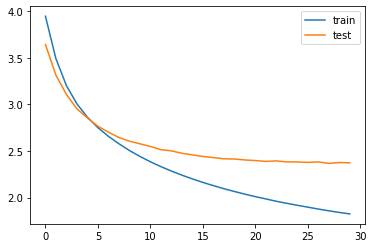

In [41]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [42]:
src_index_to_word = src_tokenizer2.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer2.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer2.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [43]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [44]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text2_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [45]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [46]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


In [47]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input2_test[i]))
    print("실제 요약 :", seq2summary(decoder_input2_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input2_test[i].reshape(1, text2_max_len)))
    print("\n")

원문 : england's ben who was called up to take part in an ashes tour game has been dropped from the squad after he a drink on james anderson in a late night drinking incident in perth earlier a midnight was imposed on england after was involved in a incident with australia's cameron bancroft at a bar 
실제 요약 : player dropped from ashes tour game after bar 
예측 요약 :  bowler once called out field after


원문 : a died in karnataka after the state's former cm bs son by car allegedly ran over him the police said that was in the vehicle at the time of the incident but wasn't driving it it appears that the victim was crossing the road driver could not spot him in the a police official said 
실제 요약 : former karnataka cm's car runs over 
예측 요약 :  karnataka cm son dies after car hits


원문 : starbucks has been slammed after a man received his order with a racial written on it an employee at the california outlet of starbucks wrote on the coffee cup instead of his name the outlet offered free coffee and

In [48]:
import requests
from summa.summarizer import summarize

In [49]:
data2_makeheadlines = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [50]:
for i in range(0,5):
    print('text:')
    print(data2_makeheadlines['text'][i])
    print('headlines:')
    print(summarize(data2_makeheadlines['text'][i], ratio=0.005))

text:
Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
headlines:

text:
Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
headlines:

text:
New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories d

# 회고

회고쓸 시간이 없다 너무 오래걸린다 학습 ㄷㄷ